<a href="https://colab.research.google.com/github/JacobHSampson/FranklinU/blob/main/Jacob_Sampson_Assignment03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment for Week 3

## Purpose:
This assignment is intended to help you do the following:
1.	Become familiar with the Seaborn package
2.	Learn to visualize data using Seaborn
3.	Distinguish between various charts and when to utilize them


## Action Items:
•	Create three different charts using Seaborn package.   
  1. Create three different meaningful charts using Seaborn package on your selected data set.      
  2. Explain when it is best to use      
  3. Post your work in GitHub     
  4. Add a README file     


In [1]:
from google.colab import files 
  
  
uploaded = files.upload()

Saving Training set data.csv to Training set data.csv


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas.testing as tm
import numpy as np

In [3]:
import io 
  
df = pd.read_csv(io.BytesIO(uploaded['Training set data.csv'])) 


In [4]:
df.head()

,id,status_group,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,functional,6000.0,3/14/2011,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,functional,0.0,3/6/2013,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,functional,25.0,2/25/2013,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,non functional,0.0,1/28/2013,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,functional,0.0,7/13/2011,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [5]:
df_pairs = df[['status_group','amount_tsh','gps_height','population','construction_year','latitude','longitude']]
df_pairs

,status_group,amount_tsh,gps_height,population,construction_year,latitude,longitude
0,functional,6000.0,1390,109,1999,-9.856322,34.938093
1,functional,0.0,1399,280,2010,-2.147466,34.698766
2,functional,25.0,686,250,2009,-3.821329,37.460664
3,non functional,0.0,263,58,1986,-11.155298,38.486161
4,functional,0.0,0,0,0,-1.825359,31.130847
...,...,...,...,...,...,...,...
59395,functional,10.0,1210,125,1999,-3.253847,37.169807
59396,functional,4700.0,1212,56,1996,-9.070629,35.249991
59397,functional,0.0,0,0,0,-8.750434,34.017087
59398,functional,0.0,0,0,0,-6.378573,35.861315


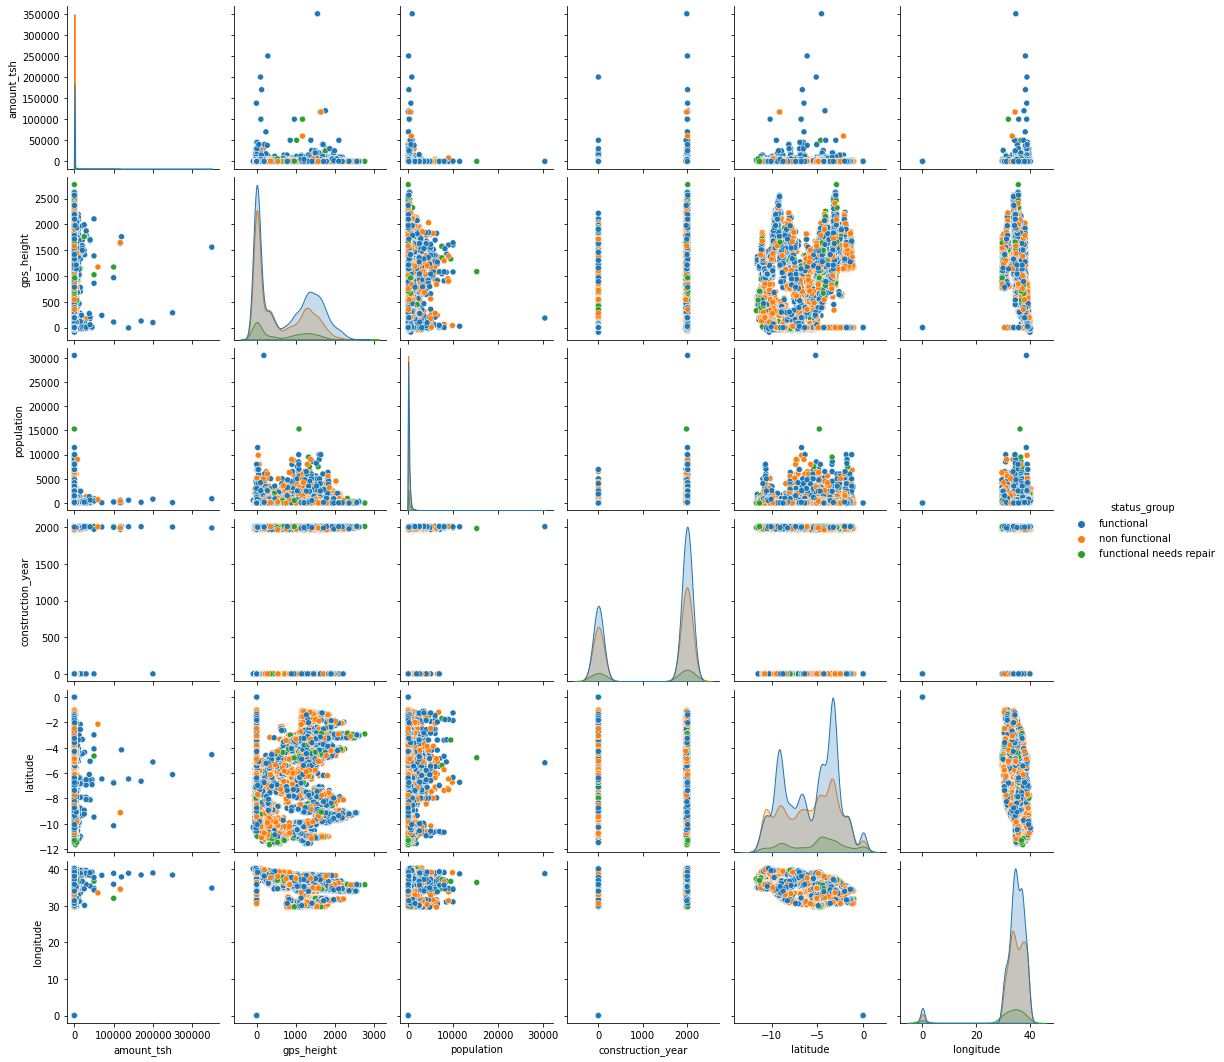

In [6]:

fig = sns.pairplot(df_pairs,hue='status_group')

It's best to use the pairplot when there are many numeric variable to compare. 

Each pair gets a scatterplot to see possible correlations.

Setting hue=status_group allows to differentiate between the categories and visualize possible patterns.

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:1641: FutureWarning: Use `x` and `y` rather than `data` `and `data2`
  warnings.warn(msg, FutureWarning)


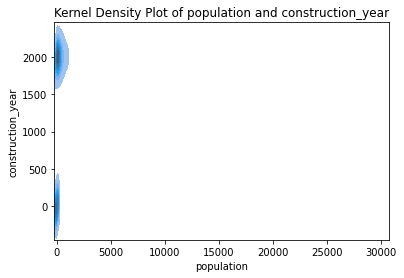

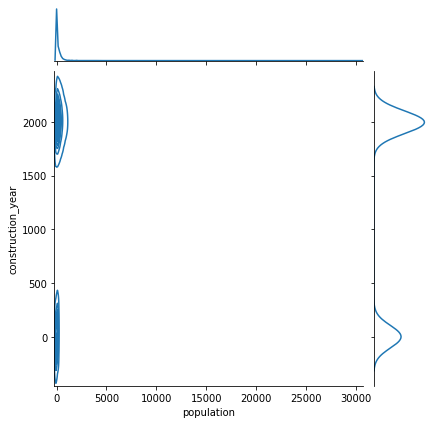

In [7]:
kde, ax = plt.subplots()

ax = sns.kdeplot(data=df['population'],

                 data2=df['construction_year'],

                 shade=True) # shade will fill in the contours

ax.set_title('Kernel Density Plot of population and construction_year')

ax.set_xlabel('population')

ax.set_ylabel('construction_year')

plt.show()
kde_joint = sns.jointplot(x='population', y='construction_year',

                          data=df, kind='kde')

In [11]:
df = df.dropna(subset=['population'])
df = df[df.population != 0]
df = df[df.construction_year != 0]
df['population'] =  np.log10(df['population'])
df.shape

(30423, 41)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:1641: FutureWarning: Use `x` and `y` rather than `data` `and `data2`
  warnings.warn(msg, FutureWarning)


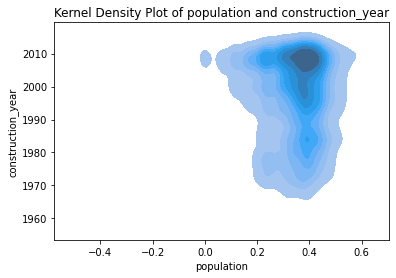

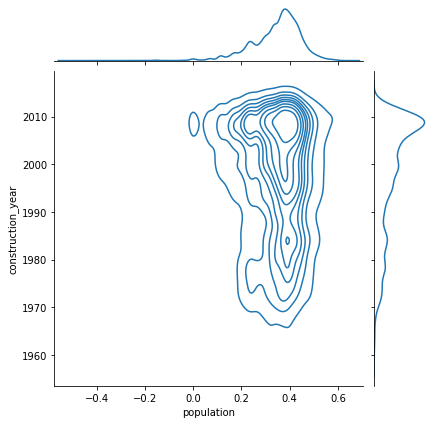

In [12]:
kde, ax = plt.subplots()

ax = sns.kdeplot(data=df['population'],

                 data2=df['construction_year'],

                 shade=True) # shade will fill in the contours

ax.set_title('Kernel Density Plot of population and construction_year')

ax.set_xlabel('population')

ax.set_ylabel('construction_year')

plt.show()
kde_joint = sns.jointplot(x='population', y='construction_year',

                          data=df, kind='kde')

Kernel Density plot is best to use with two continuous variables. Since population and construction_year had many invalid values that made the plot useless. These values were thrown out, and log of the population was used since it is closer to a normal distribution.

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


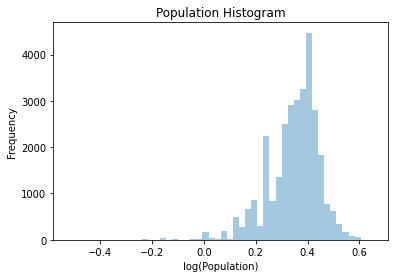

In [13]:
hist, ax = plt.subplots()

ax = sns.distplot(df['population'], kde=False)

ax.set_title('Population Histogram')

ax.set_xlabel('log(Population)')

ax.set_ylabel('Frequency')

plt.show()

Histogram is used to check the distribution shape of the continuous variable. The original population variable was very skewed (a few very high values), but the log of population is approximately normal